In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Pre processing img data


In [3]:
dataset_dir = "caltech-101-img" #Specifies the directory path where the dataset is located
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)
#normalises the image

# # here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64), #resizes the image into 64 by 64 pixel
    batch_size=batch_size, #Sets the batch size for training.
    class_mode='categorical' # labels are one-hot encoded
)

Found 9144 images belonging to 102 classes.


# Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data# 

In [4]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# a. Load in a pre-trained CNN model trained on a large dataset

In [6]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

# b. Freeze parameters (weights) in model’s lower convolutional layers

In [7]:
for layer in base_model.layers:
   layer.trainable = False

# c. Add custom classifier with several layers of trainable parameters to model

In [8]:

x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# d. Train classifier layers on training data available for task



In [9]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 20s 605ms/step - loss: 3.8374 - accuracy: 0.2195 - val_loss: 3.3582 - val_accuracy: 0.2945
Epoch 2/10
32/32 [==============================] - 19s 588ms/step - loss: 2.9401 - accuracy: 0.3640 - val_loss: 2.9540 - val_accuracy: 0.3655
Epoch 3/10
32/32 [==============================] - 19s 594ms/step - loss: 2.4536 - accuracy: 0.4555 - val_loss: 2.6491 - val_accuracy: 0.4495
Epoch 4/10
32/32 [==============================] - 18s 581ms/step - loss: 2.0554 - accuracy: 0.5620 - val_loss: 2.4060 - val_accuracy: 0.4775
Epoch 5/10
32/32 [==============================] - 19s 598ms/step - loss: 1.7585 - accuracy: 0.6110 - val_loss: 2.2323 - val_accuracy: 0.4980
Epoch 6/10
32/32 [==============================] - 19s 591ms/step - loss: 1.5261 - accuracy: 0.6670 - val_loss: 2.1107 - val_accuracy: 0.5165
Epoch 7/10
32/32 [==============================] - 19s 597ms/step - loss: 1.3379 - accuracy: 0.7070 - val_loss: 2.0549 - val_accuracy: 0.5235

# e. Fine-tune hyper parameters and unfreeze more layers as needed

In [11]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 23s 691ms/step - loss: 3.1784 - accuracy: 0.3510 - val_loss: 2.4206 - val_accuracy: 0.4645
Epoch 2/10
32/32 [==============================] - 21s 676ms/step - loss: 1.7622 - accuracy: 0.5845 - val_loss: 1.9448 - val_accuracy: 0.5485
Epoch 3/10
32/32 [==============================] - 22s 691ms/step - loss: 1.1480 - accuracy: 0.6965 - val_loss: 1.8405 - val_accuracy: 0.5730
Epoch 4/10
32/32 [==============================] - 22s 711ms/step - loss: 0.7425 - accuracy: 0.8000 - val_loss: 1.6617 - val_accuracy: 0.6125
Epoch 5/10
32/32 [==============================] - 22s 703ms/step - loss: 0.4224 - accuracy: 0.8825 - val_loss: 1.7478 - val_accuracy: 0.6105
Epoch 6/10
32/32 [==============================] - 22s 712ms/step - loss: 0.2526 - accuracy: 0.9290 - val_loss: 1.7860 - val_accuracy: 0.6185
Epoch 7/10
32/32 [==============================] - 22s 701ms/step - loss: 0.1483 - accuracy: 0.9600 - val_loss: 1.7710 - val_accuracy: 0.6225

In [12]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 11s 168ms/step


In [13]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  crab
Actual:  crab


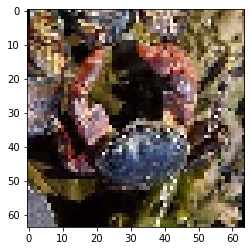

In [17]:
n = 900
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])